# Reto 3. codon_usage.csv

1. Generar una descripción en dos dimensiones de los datos (PCA, tSNE, Isomap,
MDS, UMAP, etc)

2. Identificar anomalías bajo los siguientes criterios:  
    2.1  k-medias  
    2.2 distancia al vecino más cercano etc.  
    2.3 Bosques de aislamiento (Isolation forests)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import precision_score, recall_score, f1_score
from deap import base, creator, tools, algorithms


C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecatio

In [2]:
f = 'codon_usage.csv'
df = pd.read_csv(f,sep='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000903,0.039711,0.016245,0.015343,0.000000,0.002708,0.000000,0.039711,0.037906,0.006318,...,0.020758,0.002708,0.000903,0.026173,0.006318,0.017148,0.009928,0.000000,0.000903,0.002708
1,0.000000,0.018349,0.000000,0.009174,0.064220,0.009174,0.018349,0.000000,0.000000,0.027523,...,0.009174,0.055046,0.027523,0.000000,0.027523,0.009174,0.009174,0.009174,0.000000,0.000000
2,0.002589,0.039148,0.031852,0.005480,0.000776,0.003668,0.000358,0.036549,0.060896,0.001604,...,0.025892,0.000445,0.000660,0.027529,0.000633,0.015795,0.015154,0.000140,0.000535,0.002378
3,0.001891,0.000630,0.000315,0.002206,0.025528,0.008824,0.010085,0.003152,0.001576,0.025528,...,0.010085,0.039395,0.025528,0.010715,0.050425,0.021116,0.014812,0.003467,0.000000,0.000315
4,0.001413,0.001413,0.000000,0.007063,0.012996,0.000989,0.004662,0.001695,0.000283,0.012007,...,0.006781,0.038000,0.017375,0.011301,0.055516,0.015398,0.005933,0.003673,0.000141,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,0.003566,0.023335,0.006949,0.018750,0.002336,0.001639,0.004912,0.010441,0.053597,0.011806,...,0.015272,0.023290,0.005338,0.024446,0.029277,0.027408,0.015216,0.001882,0.000306,0.000992
4920,0.000000,0.011976,0.005988,0.021956,0.009980,0.000000,0.003992,0.009980,0.003992,0.011976,...,0.021956,0.015968,0.000000,0.049900,0.025948,0.033932,0.019960,0.001996,0.000000,0.000000
4921,0.002162,0.002162,0.000432,0.009082,0.016434,0.001297,0.009082,0.001297,0.002595,0.010667,...,0.006919,0.045697,0.025083,0.007640,0.039066,0.020902,0.015136,0.001586,0.000000,0.000144
4922,0.004504,0.004504,0.002252,0.012669,0.012106,0.003097,0.009854,0.009009,0.003378,0.024493,...,0.007601,0.035191,0.013513,0.014358,0.035755,0.019707,0.005631,0.001689,0.001408,0.000563


Text(0, 0.5, 'Frecuencia')

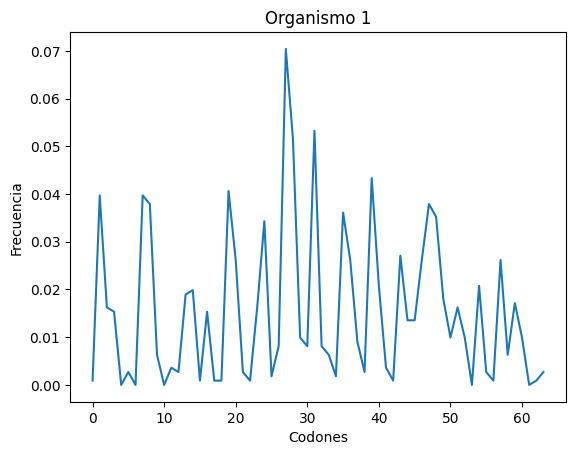

In [3]:
plt.plot(df.iloc[0])
plt.title('Organismo 1')
plt.xlabel('Codones')
plt.ylabel('Frecuencia')

## PCA 
### Análisis de componentes principales

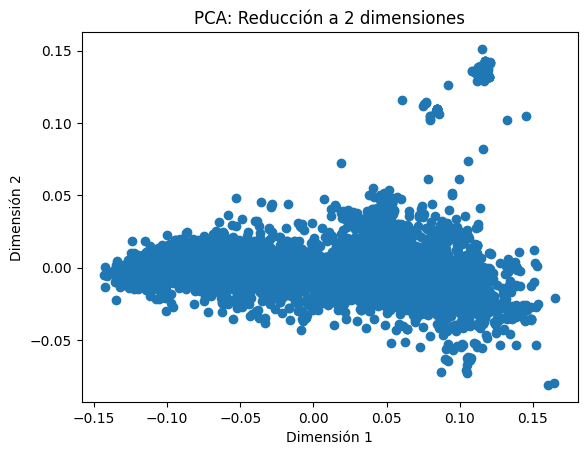

In [4]:
# Aplica PCA para reducir la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

# Crea un nuevo DataFrame con las dos dimensiones reducidas
df_2d_PCA = pd.DataFrame(data=df_reduced, columns=['Dimensión 1', 'Dimensión 2'])

# Grafica los datos en dos dimensiones
plt.scatter(df_2d_PCA['Dimensión 1'], df_2d_PCA['Dimensión 2'])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('PCA: Reducción a 2 dimensiones')
plt.show()

## t-SNE
### t-Distributed Stochastic Neighbor Embedding

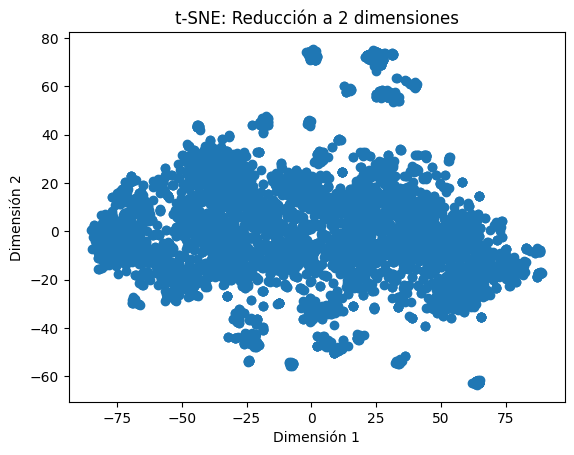

In [5]:
# Aplica t-SNE para reducir la dimensionalidad a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df)

# Crea un nuevo DataFrame con las dos dimensiones reducidas
df_2d_t = pd.DataFrame(data=df_reduced, columns=['Dimensión 1', 'Dimensión 2'])

# Grafica los datos en dos dimensiones
plt.scatter(df_2d_t['Dimensión 1'], df_2d_t['Dimensión 2'])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('t-SNE: Reducción a 2 dimensiones')
plt.show()


## UMAP
### Uniform Manifold Approximation and Projection

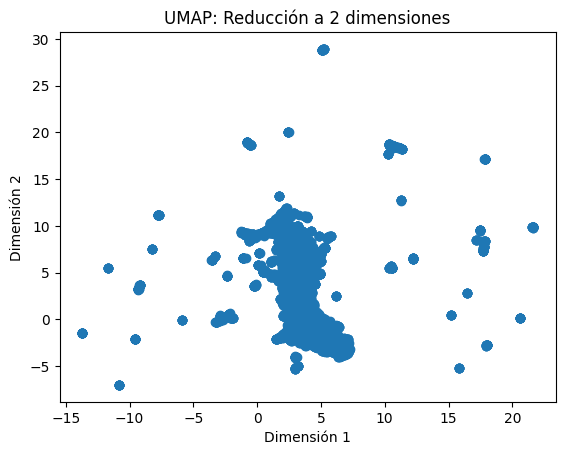

In [6]:
# Aplica UMAP para reducir la dimensionalidad a 2 dimensiones
reducer = umap.UMAP(n_components=2, random_state=42)
df_reduced = reducer.fit_transform(df)

# Crea un nuevo DataFrame con las dos dimensiones reducidas
df_2d_u = pd.DataFrame(data=df_reduced, columns=['Dimensión 1', 'Dimensión 2'])

# Grafica los datos en dos dimensiones
plt.scatter(df_2d_u['Dimensión 1'], df_2d_u['Dimensión 2'])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('UMAP: Reducción a 2 dimensiones')
plt.show()


# Deteccion de anomalias 

In [165]:
# Eleccion de cual metodo de reduccion se utilizara
df_2d = df_2d_t

### K-Means

C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

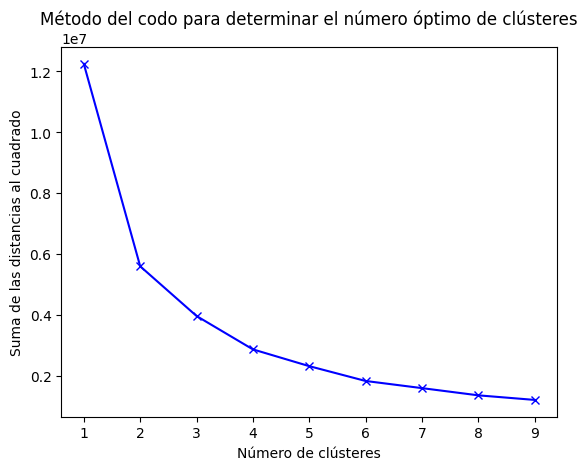

In [166]:
# Prueba diferentes números de clústeres y calcula la suma de las distancias al cuadrado
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2d)
    distortions.append(kmeans.inertia_)

# Grafica la suma de las distancias al cuadrado en función del número de clústeres
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústeres')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo para determinar el número óptimo de clústeres')
plt.show()


C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


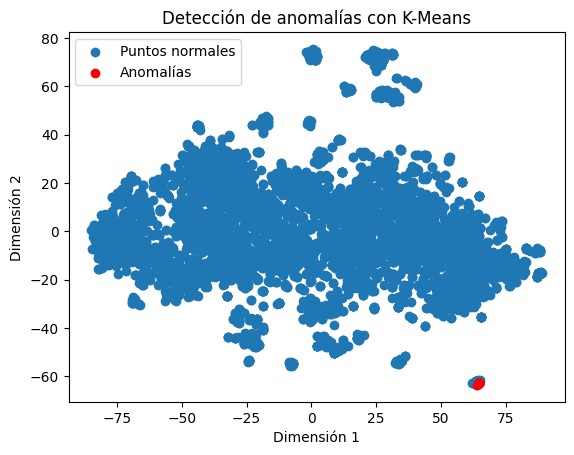

In [859]:
# Aplica K-Means con un número de clústeres adecuado
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(df_2d)

# Calcula la distancia de cada punto a su centroide asignado
distances = np.min(kmeans.transform(df_2d), axis=1)

# Define un umbral para determinar qué puntos considerar como anomalías
threshold = np.percentile(distances, 99.593)  # Por ejemplo, consideramos el 5% más lejano como anomalías

# Identifica los puntos que superan el umbral como anomalías
anomalies_kmeans = df_2d[distances > threshold]

# Visualiza los puntos normales y anomalías
plt.scatter(df_2d['Dimensión 1'], df_2d['Dimensión 2'], label='Puntos normales')
plt.scatter(anomalies_kmeans['Dimensión 1'], anomalies_kmeans['Dimensión 2'], color='red', label='Anomalías')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Detección de anomalías con K-Means')
plt.legend()
plt.show()


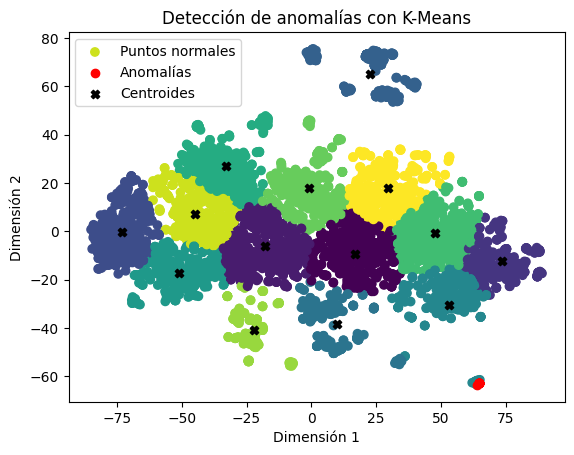

In [860]:
# Obtiene los centroides de los clústeres
centroids = kmeans.cluster_centers_

# Grafica los puntos normales y los centroides de los clústeres
plt.scatter(df_2d['Dimensión 1'], df_2d['Dimensión 2'], c=kmeans.labels_, label='Puntos normales')
plt.scatter(anomalies_kmeans['Dimensión 1'], anomalies_kmeans['Dimensión 2'], color='red', label='Anomalías')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', label='Centroides')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Detección de anomalías con K-Means')
plt.legend()
plt.show()


In [861]:
anomaly_indices_kmeans= anomalies_kmeans.index
anomaly_indices_kmeans

Index([3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3786, 3787,
       3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796],
      dtype='int64')

## Algoritmo KNN

### Definicion de los parametros optimos por algoritmo genetico

In [170]:
def evaluate_fitness(individual):
    n_neighbors = individual[0]
    anomaly_threshold = individual[1]
    
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors.fit(df_2d)
    distances, _ = neighbors.kneighbors(df_2d)
    mean_distances = distances.mean(axis=1)
    
    threshold = mean_distances.mean() + anomaly_threshold * mean_distances.std()
    predictions = mean_distances > threshold
    
    fitness = np.sum(mean_distances)  # Métrica interna a minimizar
    
    return fitness,

In [171]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("n_neighbors", np.random.randint, low=1, high=100)
toolbox.register("anomaly_threshold", np.random.uniform, low=0.0, high=1.0)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.n_neighbors, toolbox.anomaly_threshold), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_fitness)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=[1, 0], up=[100, 1], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [172]:
population_size = 50
generations = 10

population = toolbox.population(n=population_size)
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

for generation in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    population[:] = toolbox.select(offspring, k=population_size)


In [173]:
best_individuals = tools.selBest(population, k=5)
best_parameters = [(ind[0], ind[1]) for ind in best_individuals]
best_parameters

[(99, 0),
 (99, 0.6890895179811933),
 (99, 0.32198654114685443),
 (99, 0.304025273240233),
 (99, 0.32198654114685443)]

### Aplicacion de KNN

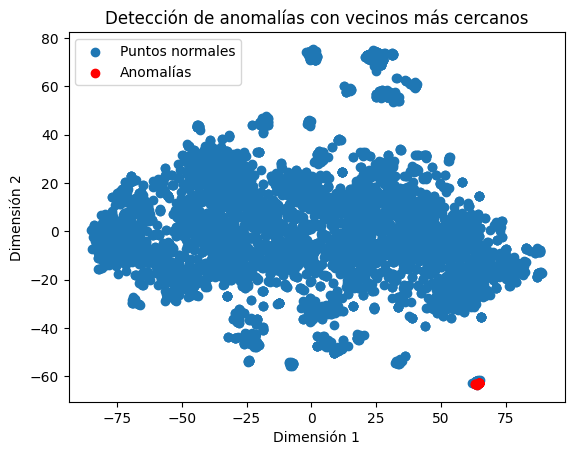

In [716]:
n_neighbors = 800  # Número de vecinos más cercanos a considerar
anomaly_threshold = 4.1 # Umbral para detectar anomalías

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors.fit(df_2d)
# Calcula las distancias a los k vecinos más cercanos de cada punto
distances, _ = neighbors.kneighbors(df_2d)
# Calcula la distancia media a los k vecinos más cercanos para cada punto
mean_distances = distances.mean(axis=1)
# Define un umbral para determinar qué puntos considerar como anomalías
threshold = mean_distances.mean() + anomaly_threshold * mean_distances.std()
# Identifica los puntos que superan el umbral como anomalías
anomalies_KNN = df_2d[mean_distances > threshold]

plt.scatter(df_2d['Dimensión 1'], df_2d['Dimensión 2'], label='Puntos normales')
plt.scatter(anomalies_KNN['Dimensión 1'], anomalies_KNN['Dimensión 2'], color='red', label='Anomalías')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Detección de anomalías con vecinos más cercanos')
plt.legend()
plt.show()


In [717]:
anomaly_indices_KNN = anomalies_KNN.index
anomaly_indices_KNN

Index([3767, 3768, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784,
       3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796],
      dtype='int64')

## LOL
### Local Outlier Factor

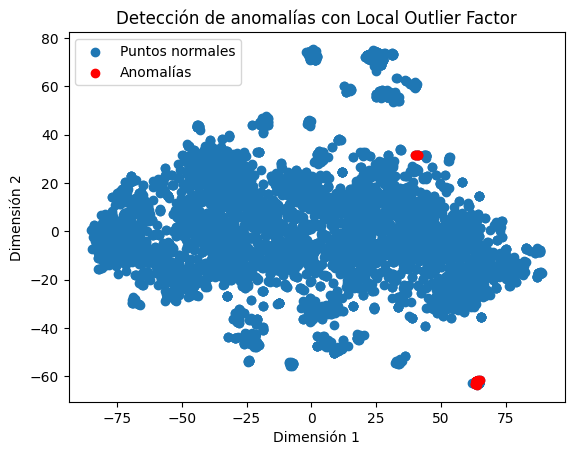

In [951]:
from sklearn.neighbors import LocalOutlierFactor

# Crea una instancia del estimador LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination = 0.003)

# Ajusta el modelo a tus datos y obtén las etiquetas de anomalía
labels = lof.fit_predict(df_2d)

# Identifica los puntos que tienen una etiqueta de -1 como anomalías
anomalies_LOL = df_2d[labels == -1]



# Scatter plot de los puntos normales
plt.scatter(df_2d['Dimensión 1'], df_2d['Dimensión 2'], label='Puntos normales')

# Scatter plot de las anomalías
plt.scatter(anomalies_LOL['Dimensión 1'], anomalies_LOL['Dimensión 2'], color='red', label='Anomalías')

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Detección de anomalías con Local Outlier Factor')
plt.legend()
plt.show()


In [952]:
anomaly_indices_LOL = anomalies_LOL.index
anomaly_indices_LOL

Index([ 763, 1132, 2259, 2260, 2266, 3767, 3768, 3769, 3770, 3771, 3772, 3773,
       3774, 3781, 3785],
      dtype='int64')

## Isolation forest

C:\Users\landa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


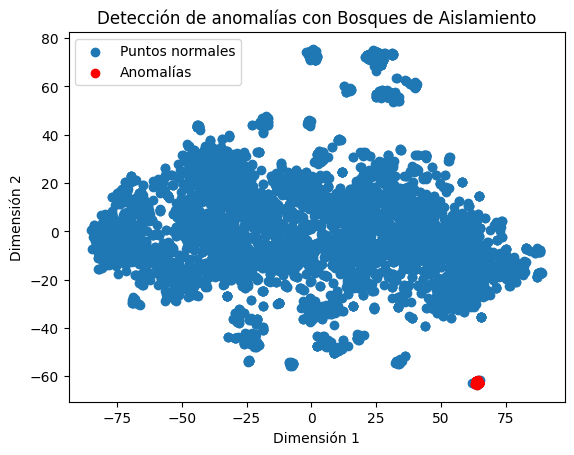

In [974]:
from sklearn.ensemble import IsolationForest

# Crea una instancia del estimador Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.006, random_state=42)

# Entrena el modelo y obtiene las etiquetas de anomalía (-1 para anomalías, 1 para instancias normales)
labels = isolation_forest.fit_predict(df_2d)

# Identifica los puntos que tienen una etiqueta de -1 como anomalías
anomalies_If = df_2d[labels == -1]


plt.scatter(df_2d['Dimensión 1'], df_2d['Dimensión 2'], label='Puntos normales')
plt.scatter(anomalies_If['Dimensión 1'], anomalies_If['Dimensión 2'], color='red', label='Anomalías')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Detección de anomalías con Bosques de Aislamiento')
plt.legend()
plt.show()


In [975]:
anomaly_indices_If = anomalies_If.index
anomaly_indices_If

Index([3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778,
       3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790,
       3791, 3792, 3793, 3794, 3795, 3796],
      dtype='int64')

### Eleccion de las anomalias

In [976]:
print("Anomalias kmeans =", anomaly_indices_kmeans.shape[0])
print("Anomalias KNN    =", anomaly_indices_KNN.shape[0])
print("Anomalias LOL    =", anomaly_indices_LOL.shape[0])
print("Anomalias If     =", anomaly_indices_If.shape[0])

Anomalias kmeans = 21
Anomalias KNN    = 23
Anomalias LOL    = 15
Anomalias If     = 30


In [979]:
common_indices = (
    anomaly_indices_kmeans.intersection(anomaly_indices_KNN)
    .intersection(anomaly_indices_LOL)
    .intersection(anomaly_indices_If)
)

# common_indices = (
#     anomaly_indices_If.intersection(anomaly_indices_KNN)
#     .intersection(anomaly_indices_LOL)
# )

# common_indices = (
#     anomaly_indices_kmeans.intersection(anomaly_indices_KNN)
# )

common_indices = (
    anomaly_indices_LOL.intersection(anomaly_indices_If)
)

common_values = common_indices.values
print(common_values.shape[0])
common_values

10


array([3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3781, 3785],
      dtype=int64)

In [986]:
# Abrir el archivo en modo de escritura ('w') para reemplazarlo cada vez
with open('Resultados.txt', 'w') as file:
    # Guardar el numpy array en el archivo
    np.savetxt(file, common_values, fmt='%d')

In [981]:
anomaly_indices = anomaly_indices_If

In [982]:
anomaly_indices.to_series().to_csv('anomaly_indices.txt', header=False, index=False, mode='w')


AttributeError: 'numpy.ndarray' object has no attribute 'to_series'

In [26]:
type(anomaly_indices_kmeans)

pandas.core.indexes.base.Index